<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\GAURI DUBEY\AppData\Local\Temp\ipykernel_4436\3790799005.py:12: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_excel("D:\DS\Clustering\EastWestAirlines.xlsx", sheet_name='data')


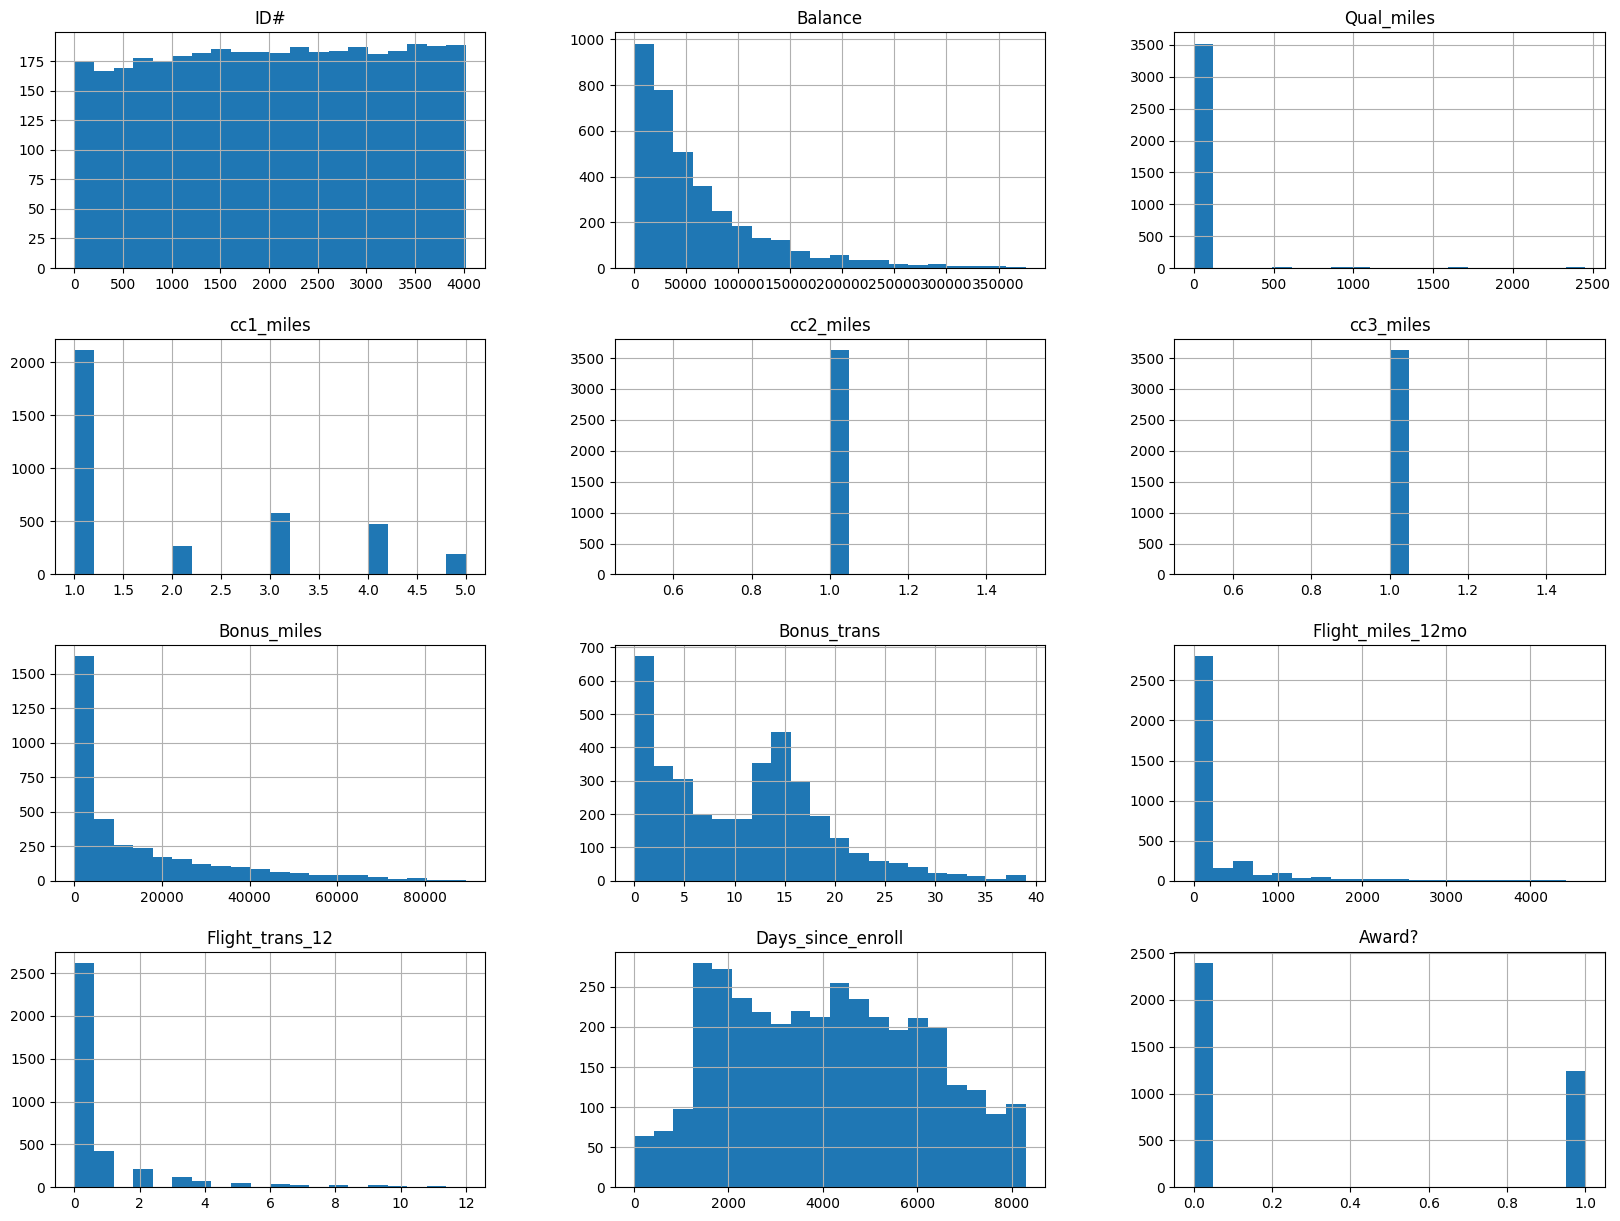

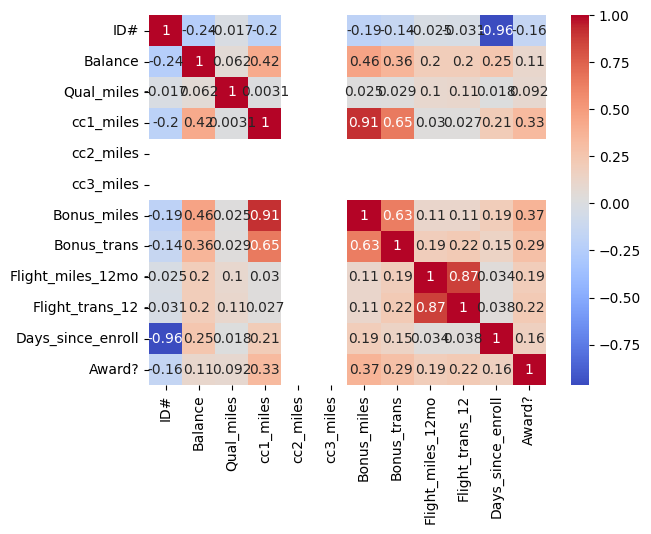

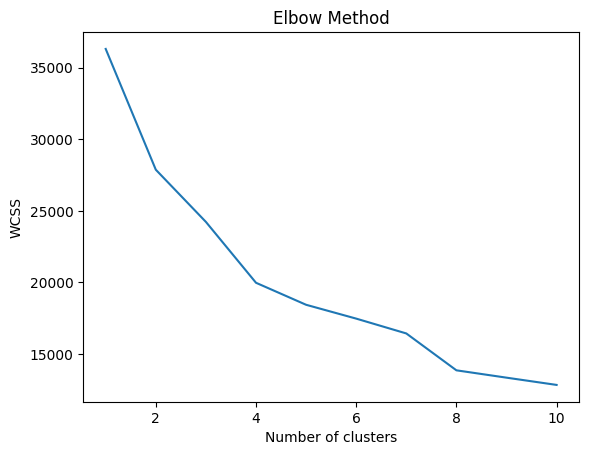

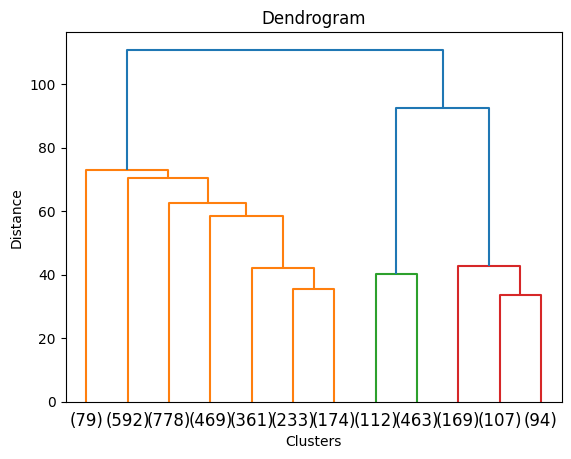

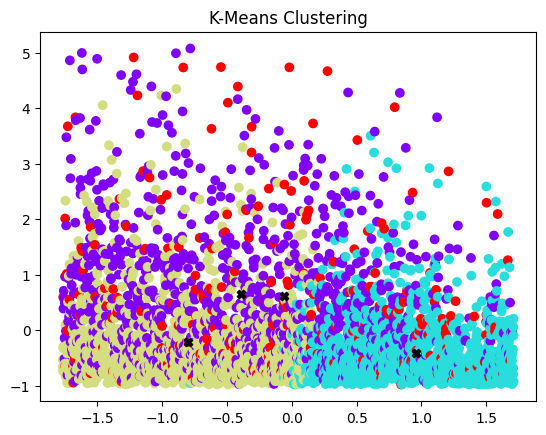

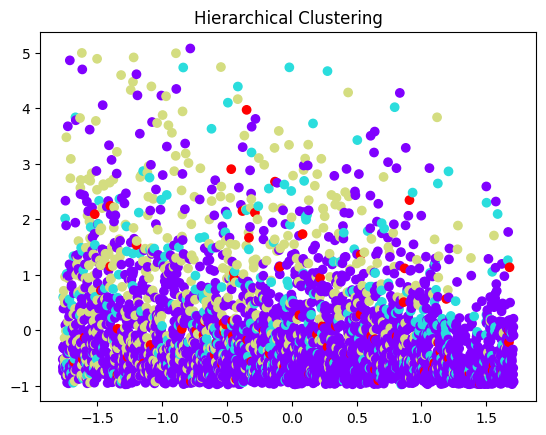

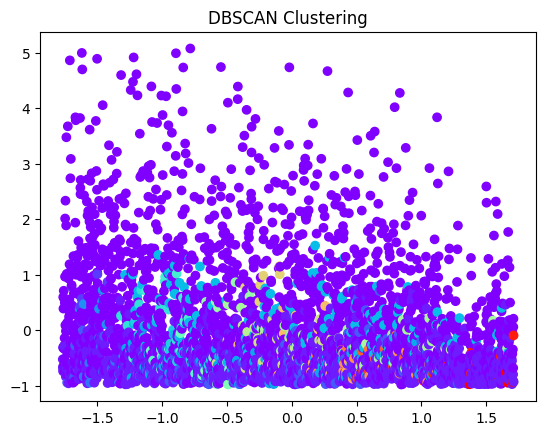

K-Means Silhouette Score: 0.2422977089426669
Hierarchical Clustering Silhouette Score: 0.2906234725569908
DBSCAN Silhouette Score: -0.3994808098553046


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

# Loading dataset
df = pd.read_excel("D:\DS\Clustering\EastWestAirlines.xlsx", sheet_name='data')

# Data Preprocessing
# Handleing missing values
df = df.dropna()

# Outlier detection and removal
z_scores = np.abs((df - df.mean()) / df.std())
df = df[(z_scores < 3).all(axis=1)]

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Exploratory Data Analysis
# Distribution analysis
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Correlation analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# K-Means Clustering
# Elbow method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Implementing K-Means with optimal K
optimal_k = 4  # assuming 4 from elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Hierarchical Clustering
# Dendrogram
linked = linkage(scaled_data, method='ward')
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

# Implementing Hierarchical Clustering with optimal linkage
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(scaled_data)

# DBSCAN Clustering
# Implementing DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Visualization
# K-Means Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clustering Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_clusters, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_clusters, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

# Evaluation
# Silhouette Score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_clusters)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
